In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np

from matplotlib import pyplot as plt

from slingshot import Slingshot

(1000, 2)


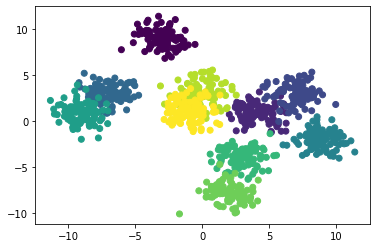

In [2]:
load=True
num_cells = 1000
num_dims_reduced = 2
num_branches = 2
K = 10 # cluster labels
if num_branches == 2:
    filename = 'fakedata-2branch.npy'
    start_node = 5
else:
    filename = 'fakedata-1branch.npy'
    start_node = 4

if load:
    data = np.load(filename, allow_pickle=True).item()
    cluster_labels = data['cluster_labels']
    data = data['data'].numpy()
else:
    cluster_labels = np.zeros([num_cells], dtype=int)
    data = list()
    for k in range(K):
        cells = num_cells // K
        offset = torch.randint(20, torch.Size([2])) - 10
        print(offset.shape)

        data.append(offset + torch.randn(torch.Size([num_cells//K, num_dims_reduced])))
        cluster_labels[k*cells:(k+1)*cells] = k
    data = torch.cat(data)
    np.save(filename, dict(data=data, cluster_labels=cluster_labels))
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels)

cluster_labels_onehot = np.zeros((cluster_labels.shape[0], cluster_labels.max()+1))
cluster_labels_onehot[np.arange(cluster_labels.shape[0]), cluster_labels] = 1

print(data.shape)

Lineages: [Lineage[5, 3, 9, 8, 0], Lineage[5, 3, 9, 8, 1, 2, 4], Lineage[5, 3, 9, 8, 1, 6, 7]]


  0%|          | 0/1 [00:00<?, ?it/s]

Reversing from leaf to root
Averaging branch @1 with lineages: [1, 2] [<pcurve.PrincipalCurve object at 0x00000190898E4748>, <pcurve.PrincipalCurve object at 0x000001908979F948>]
Averaging branch @8 with lineages: [0, 1, 2] [<pcurve.PrincipalCurve object at 0x0000019089AE7508>, <pcurve.PrincipalCurve object at 0x000001908978BC48>]
Shrinking branch @8 with curves: [<pcurve.PrincipalCurve object at 0x0000019089AE7508>, <pcurve.PrincipalCurve object at 0x000001908978BC48>]
Shrinking branch @1 with curves: [<pcurve.PrincipalCurve object at 0x00000190898E4748>, <pcurve.PrincipalCurve object at 0x000001908979F948>]


100%|██████████| 1/1 [00:03<00:00,  3.06s/it]


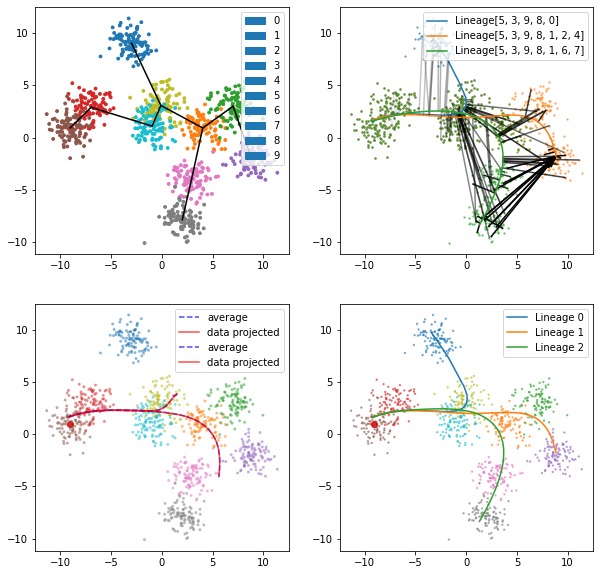

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
custom_xlim = (-12, 12)
custom_ylim = (-12, 12)
# plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)

slingshot = Slingshot(data, cluster_labels_onehot, start_node=start_node, debug_level='verbose')

slingshot.fit(num_epochs=1, debug_axes=axes)

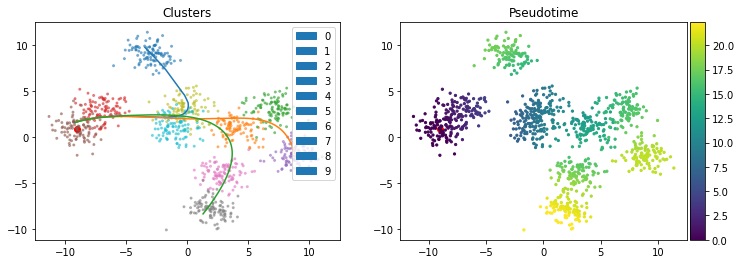

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_title('Clusters')
axes[1].set_title('Pseudotime')
slingshot.plotter.curves(axes[0], slingshot.curves)
slingshot.plotter.clusters(axes[0], labels=np.arange(slingshot.num_clusters), s=4, alpha=0.5)
slingshot.plotter.clusters(axes[1], color_mode='pseudotime', s=5)
